# Moive Recommander System

##### Import Library

In [30]:
import numpy as np
import pandas as pd

##### Import Dataset

In [31]:
col_name=['user_id','movie_id','rating','timestamp']
df=pd.read_csv('ml-100k/u.data',sep='\t',names=col_name)

In [32]:
df.head(2)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742


In [33]:
df.shape

(100000, 4)

In [34]:
# number of unique users that have rated the movie
print("So, there are ",df['user_id'].nunique(),"unique users that have rated the movies.")

So, there are  943 unique users that have rated the movies.


In [35]:
# number of unique movies that have rated the movie
print("So, there are ",df['movie_id'].nunique(),"unique movie that have been rated.")

So, there are  1682 unique movie that have been rated.


In [36]:
mf=pd.read_csv('ml-100k/u.item',sep='\|',header=None)

C:\Users\J P PANDEY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [37]:
# we only want first two columns
movie=mf[[0,1]]

In [38]:
movie.columns=['movie_id','movie_name']

In [39]:
movie.head(2)

,movie_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [40]:
# merging two dataframe 
movie=pd.merge(df,movie,on='movie_id')

In [41]:
# final dataset
movie.head(2)

,user_id,movie_id,rating,timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)


##### EDA

In [45]:
movie.groupby('movie_name').mean()['rating'].sort_values(ascending=False)

movie_name
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

From the above code we can see that `star kid,Marlene Dietrich`have rating of 5. But, no movie is perfect .it can mean that these movies are watched by 1-2 users but they liked it and rated them 5 stars. So let us considered the number of users a moive is rated by different users.

In [43]:
movie.groupby('movie_name').count()['rating'].sort_values()

movie_name
Á köldum klaka (Cold Fever) (1994)              1
Mille bolle blu (1993)                          1
Mat' i syn (1997)                               1
Marlene Dietrich: Shadow and Light (1996)       1
Man from Down Under, The (1943)                 1
                                             ... 
Liar Liar (1997)                              485
Return of the Jedi (1983)                     507
Fargo (1996)                                  508
Contact (1997)                                509
Star Wars (1977)                              583
Name: rating, Length: 1664, dtype: int64

In [46]:
rating=pd.DataFrame(movie.groupby('movie_name').mean()['rating'])

In [48]:
rating['num_of_rating']=pd.DataFrame(movie.groupby('movie_name').count()['rating'])

In [49]:
rating

,rating,num_of_rating
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


So, movie like `Á köldum klaka (Cold Fever) (1994)  ` is rated by only 1 users and rated 3 stars so we can't suggest these type of movies to the users 

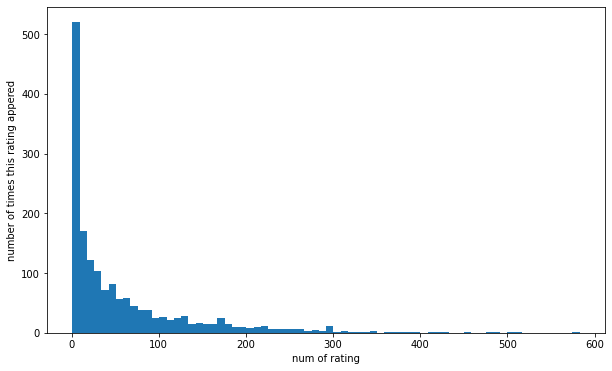

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(rating['num_of_rating'],bins=70)
plt.xlabel('num of rating')
plt.ylabel('number of times this rating appered')
plt.show()

From this graph we can see that most of the movies are rated only by 10 users even when we have 1,00,000 of datapoint so these movies are not revelant to be recommanded

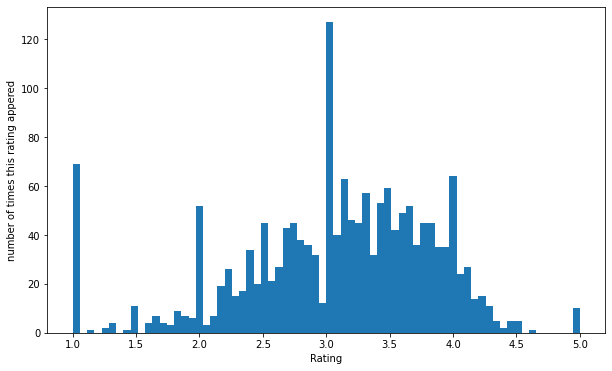

In [54]:
plt.figure(figsize=(10,6))
plt.hist(rating['rating'],bins=70)
plt.xlabel('Rating')
plt.ylabel('number of times this rating appered')
plt.show()



So this is a normal distribution where mean is around 3 and very less people given the rating of 5

## Create Movie Recommander

In [57]:
moviemat=movie.pivot_table(index='user_id',columns='movie_name',values='rating')

In [58]:
moviemat

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In this table there is a user_id and movie names as columns and rating as values that a specific user is given to a movie 

In [81]:
name='Star Wars (1977)'
movie_name=moviemat[name]

In [61]:
# finding correlation of star wars with other movie in the dataset
similarity=moviemat.corrwith(movie_name)

In [63]:
similarity[:10]

movie_name
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
dtype: float64

There are NaN values in the similarity of the movies as there is no person which have rated `star wars `and `3 Ninjas: High Noon At Mega Mountain (1998) `

In [66]:
corr_movie=pd.DataFrame(similarity,columns=['Correlation'])
corr_movie.dropna(inplace=True)
corr_movie.head(2)

,Correlation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497


In [67]:
corr_movie.sort_values('Correlation',ascending=False).head(2)

,Correlation
movie_name,
Hollow Reed (1996),1.0
Commandments (1997),1.0


Now,we can see that some movies is perfectly correlated with star-wars so there arrise a question can two movie be perfectly correlated .The answer is no .there is abiguty as we haven't considered there no of user rated the movie

In [68]:
corr_movie=corr_movie.join(rating['num_of_rating'])
corr_movie.head(2)

,Correlation,num_of_rating
movie_name,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5


In [88]:
print('Movies which are correlated to :',name)
print('___________________________________________________________')
print()
for i in range(1,5):
    print(i,".",corr_movie[corr_movie['num_of_rating']>=100].sort_values('Correlation',ascending=False)[:5].index[i])


Movies which are correlated to : Star Wars (1977)
___________________________________________________________

1 . Empire Strikes Back, The (1980)
2 . Return of the Jedi (1983)
3 . Raiders of the Lost Ark (1981)
4 . Austin Powers: International Man of Mystery (1997)
